In [16]:
import numpy                ###importamos paquetes necesarios
import matplotlib.pyplot as plt

In [17]:
 class MaxIterations(Exception):
    pass

def adaptive(f, a, b, tol, N=100000):
    """
    Metodo adaptativo para calcular integrales de funciones que varian mucho.
    nos regresa el resultado de la integral.
    """
    # Variables iniciales
    approx = 0
    i = 0
    toli = [10*tol]
    ai = [a]
    hi = [(b - a)/2]
    fai = [f(a)]
    fbi = [f(b)]
    fci = [f(a + hi[i])]
    S0i = [hi[i]*(fai[i] + 4*fci[i] + fbi[i])/3]
    Li = [1]
    
        
    
    while i >= 0:
        
        fd = f(ai[i] + hi[i]/2)
        fe = f(ai[i] + 3*hi[i]/2)
        S1 = hi[i]*(fai[i] + 4*fd + fci[i])/6
        S2 = hi[i]*(fci[i] + 4*fe + fbi[i])/6
        ai_prec = ai[i]
        hi_prec = hi[i]
        fai_prec = fai[i]
        fbi_prec = fbi[i]
        fci_prec = fci[i]
        toli_prec = toli[i]
        S0i_prec = S0i[i]
        Li_prec = Li[i]
        
        i -= 1
        if abs(S1 + S2 - S0i_prec) < toli_prec:
            approx += S1 + S2
        else:
            if Li_prec >= N:
                raise MaxIterations("Alcanzado máximo número de iteraciones.")
            
            # Intervalo derecho
            i += 1
            if i >= len(ai): # A veces hay que ampliar la lista
                ai.append(ai_prec + hi_prec)
                fai.append(fci_prec)
                fci.append(fe)
                fbi.append(fbi_prec)
                hi.append(hi_prec/2)
                toli.append(toli_prec/2)
                S0i.append(S2)
                Li.append(Li_prec + 1)
            else:
                ai[i] = ai_prec + hi_prec
                fai[i] = fci_prec
                fci[i] = fe
                fbi[i] = fbi_prec
                hi[i] = hi_prec/2
                toli[i] = toli_prec/2
                S0i[i] = S2
                Li[i] = Li_prec + 1
                
            # Intervalo izquierdo
            i += 1
            if i >= len(ai):
                ai.append(ai_prec)
                fai.append(fai_prec)
                fci.append(fd)
                fbi.append(fci_prec)
                hi.append(hi[i-1])
                toli.append(toli[i-1])
                S0i.append(S1)
                Li.append(Li[i-1])
            else:
                ai[i] = ai_prec
                fai[i] = fai_prec
                fci[i] = fd
                fbi[i] = fci_prec
                hi[i] = hi[i-1]
                toli[i] = toli[i-1]
                S0i[i] = S1
                Li[i] = Li[i-1]
                
    return approx

In [18]:
def funcion(x):
    """función a integrar"""
    return numpy.log(x)/numpy.sqrt((np.cos(x))**2 + numpy.tanh(x))

In [32]:
x = np.linspace(0.1,1,100) ## rango que utilizaremos para x y la función

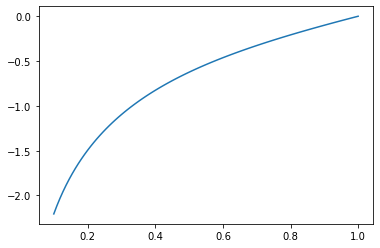

In [33]:
plt.plot(x, funcion(x))   ##Graficamos la función en el dominio en el que integraremos

In [31]:
adaptive(funcion, 0.1, 1, 0.00000001) ##usamos la def de adaptive

-0.6169301795157749

#### El resultado de la integral usando la cuadratura adaptativa nos da un resultado bastante aproximado, estando el error alrededor del noveno decimal.

In [22]:
from scipy import integrate ##importamos de scipy el comando de integración

In [30]:
integrate.quad(funcion,0.1,1) ## aplicamos el comando a la función, explicitando los rangos de integración

(-0.6169301768805372, 4.699237926463449e-11)